## Data Visualization and Accuracy Metrics

**Done by:**<br>Gabriel Egbenya<br>Data Visualization and Accuracy Metrics<br>AKA devgabriel

###### This analysis shows:

* How to graphically visualize your dataset using iris_dataset
* How to calculate Accuracy score using multiple models.
* How to compare the score across multiple models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['iris_type'] = iris_data.target_names[iris_data.target]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Inspection

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris_type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#checking for missing values

print(iris_df.isna().sum())
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_type            0
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_type            0
dtype: int64


In [6]:
#viewing the categorical variables in the dataset

print(iris_df["iris_type"].unique())
print(iris_df["iris_type"].value_counts())

['setosa' 'versicolor' 'virginica']
setosa        50
versicolor    50
virginica     50
Name: iris_type, dtype: int64


In [7]:
# class distribution
print(iris_df.groupby('iris_type').size())

iris_type
setosa        50
versicolor    50
virginica     50
dtype: int64


## Some EDA with Iris_df

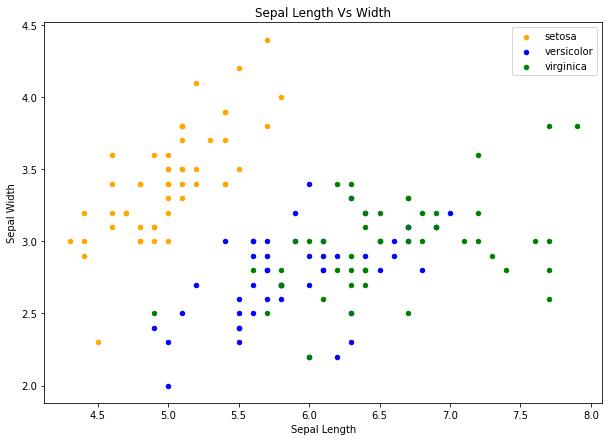

In [8]:
fig = iris_df[iris_df.iris_type == 'setosa'].plot(kind='scatter', x='sepal length (cm)', 
                                                  y='sepal width (cm)', color='orange', label='setosa')
iris_df[iris_df.iris_type == 'versicolor'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', 
                                                color='blue', label='versicolor', ax=fig)
iris_df[iris_df.iris_type == 'virginica'].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', 
                                               color='green', label='virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

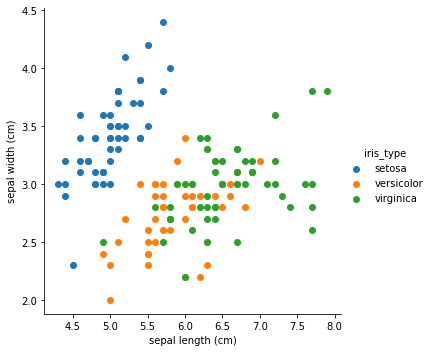

In [9]:
sns.FacetGrid(iris_df, hue='iris_type', height=5)\
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')\
   .add_legend()

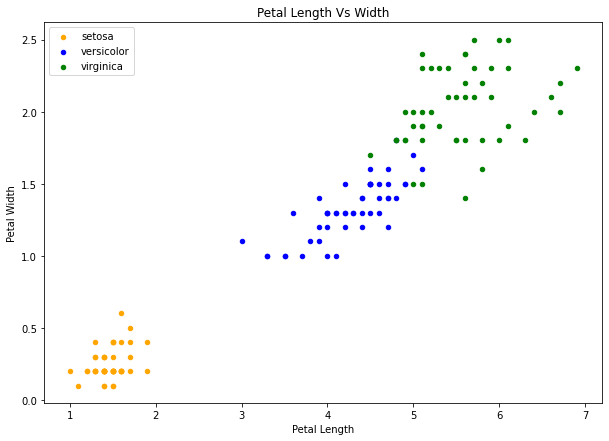

In [10]:
fig = iris_df[iris_df.iris_type == 'setosa'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='orange', label='setosa')
iris_df[iris_df.iris_type == 'versicolor'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='blue', label='versicolor', ax=fig)
iris_df[iris_df.iris_type == 'virginica'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='green', label='virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

<Figure size 432x288 with 0 Axes>

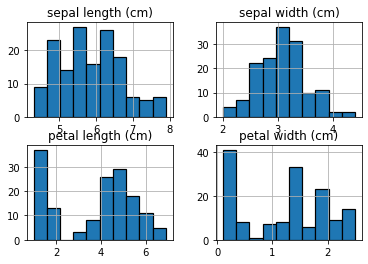

In [12]:
# histograms
fit = plt.gcf()
fig.set_size_inches(12,6)
iris_df.hist(edgecolor='black', linewidth=1.2)
plt.show()

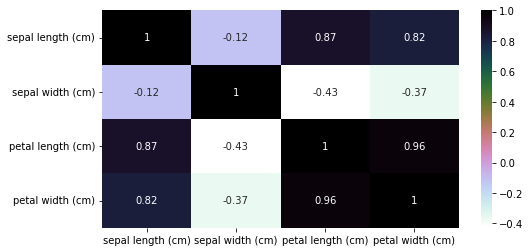

In [13]:
# draws heatmap with input as correlation matrix calculated by iris_df.corr() 
cormat = iris_df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cormat, annot=True, cmap='cubehelix_r') 
plt.show()

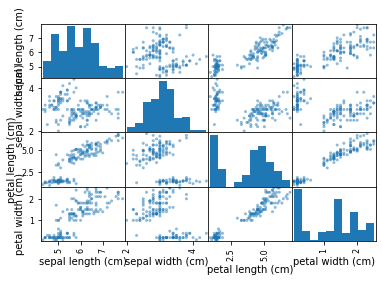

In [14]:
# scatter plot matrix
scatter_matrix(iris_df)
plt.show()

Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

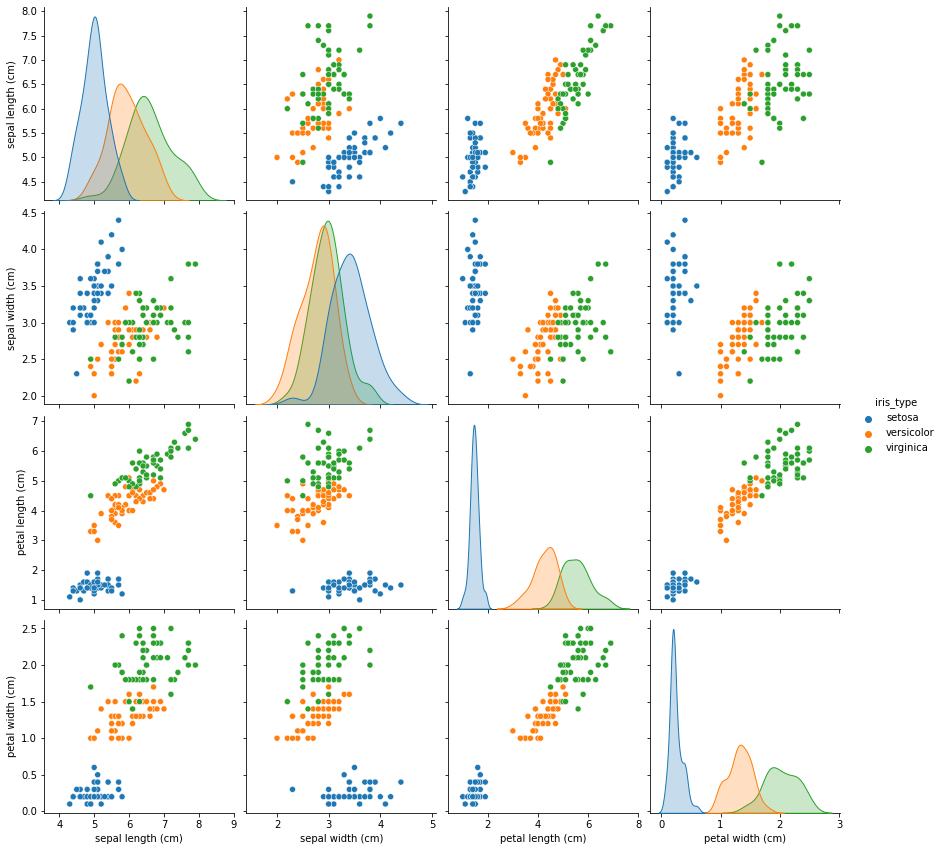

In [15]:
sns.pairplot(iris_df, hue='iris_type', height=3)

<AxesSubplot:xlabel='iris_type', ylabel='petal width (cm)'>

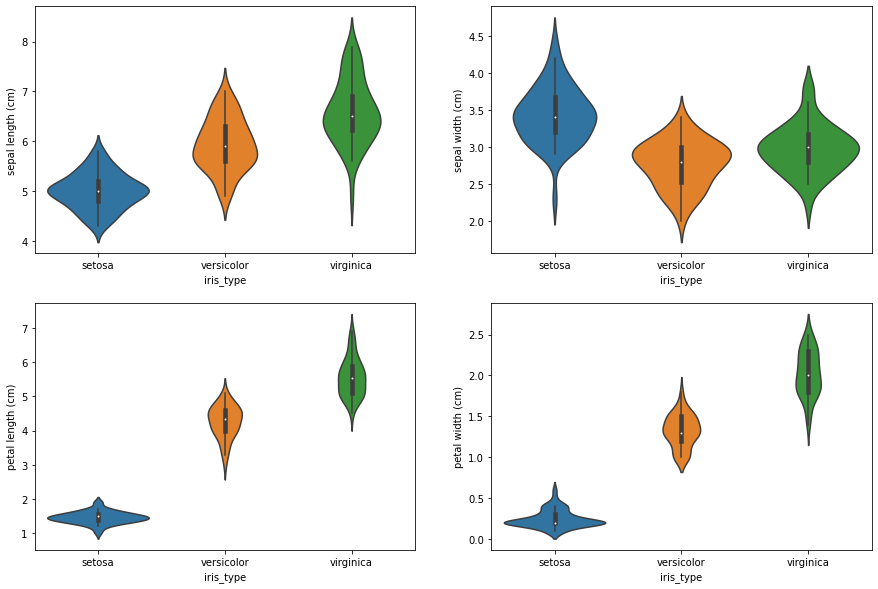

In [16]:
# In a violin plot the denser regions of the data are fatter, and sparser thiner 

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='iris_type', y = 'sepal length (cm)', data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='iris_type', y = 'sepal width (cm)', data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='iris_type', y = 'petal length (cm)', data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='iris_type', y = 'petal width (cm)', data=iris_df)

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[iris_type]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[iris_type]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[iris_type]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[iris_type]'>]],
      dtype=object)

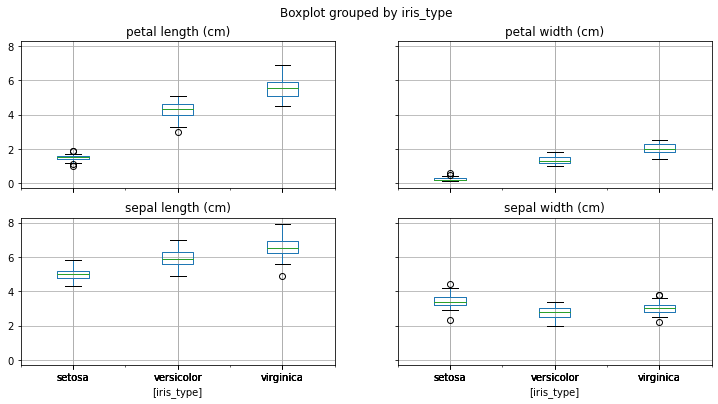

In [17]:
# make a boxplot with Pandas on each feature split out by species

iris_df.boxplot(by='iris_type', figsize=(12,6))

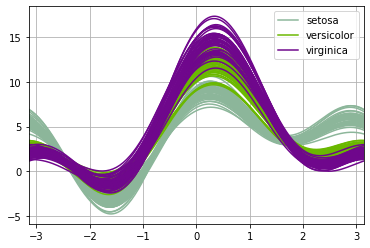

In [18]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

import pandas.plotting as pdplt
pdplt.andrews_curves(iris_df, "iris_type")
plt.show()

 ##  Split the DataFrame into features and response

In [19]:
#split into Training and Testing set 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Create the features df
X = iris_df.drop("iris_type", axis=1)

#create the response df
y = iris_df["iris_type"]

#split the df into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the data, then fit_transform it
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
#print the shape of the splitted data

print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (120, 4)
The shape of y_train:  (120,)
The shape of X_test:  (30, 4)
The shape of y_test:  (30,)


## Perform10-fold Cross Validation

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits


## Build Models

Lets evaluate three models:
* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

In [21]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# empty list that will hold the models

models_clf = [
                ("Log Reg", LogisticRegression()),
                ("KNN", KNeighborsClassifier()),
                ("SVM", SVC()),
                ("Random Forest", RandomForestClassifier()),
                ("Decision Tree", DecisionTreeClassifier()),
            ]


compared_result = pd.DataFrame()

# evaluate each model in turn

for name, clf in models_clf:
    now = time.time()
    
    model = clf
    model.fit(X_train, y_train)
    
    vals = {}
    expected = y_test
    predicted = model.predict(X_test)
    vals["Accuracy (Test)"] = "{:.2f}%".format(metrics.accuracy_score(expected, predicted)*100)
    
    expected = y_train
    predicted = model.predict(X_train)
    vals["Accuracy (Train)"] = "{:.2f}%".format(metrics.accuracy_score(expected, predicted)*100)
    
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    vals["Accuracy (CrossVal)"] = "{:.2f}%".format(scores.mean()*100)
    
    row = pd.DataFrame(vals, index=[name])
    compared_result = compared_result.append(row)

compared_result

,Accuracy (Test),Accuracy (Train),Accuracy (CrossVal)
Log Reg,96.67%,96.67%,96.33%
KNN,96.67%,95.83%,96.67%
SVM,96.67%,96.67%,97.00%
Random Forest,96.67%,100.00%,94.33%
Decision Tree,96.67%,100.00%,94.33%


## Hyperparameter Optimization for DecisionTreeClassifier and RandomForestClassifier only, and Make Predictions

Lets test the model on the validation set to make sure that our algorithms can generalize to new data. Otherwise, we may be overfitting the training data.

## Decision Tree Classifier

In [22]:
#perform grid search on the model to get the optimal hyperparameter

param_grid = [{'max_depth':[1,2,3,4,5,8,16,32], 
               'max_leaf_nodes': list(range(2, 20, 1)), 
               'min_samples_split':[2,3,4,5,8,12,16,20] }]

dt_clf_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              param_grid, 
                              verbose=1, 
                              cv=10)

#Here I call the fit() method to perform grid search using 3-fold validation.

dt_clf_grid_search.fit(X_train,y_train)
print("The best parameters are: ", dt_clf_grid_search.best_params_)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
The best parameters are:  {'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}


In [23]:
#Use the optimal hyperparameter to train the model then make prediction.

dt_clf = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, 
                                min_samples_split=2, random_state=42)

dt_clf.fit(X_train, y_train)

dt_clf_predict = dt_clf.predict(X_test)
print(f"The accuracy score for DecisionTreeClassifier GridSearchCV: {round(accuracy_score(y_test, dt_clf_predict),4)}")

The accuracy score for DecisionTreeClassifier GridSearchCV: 0.9333


## Random Forest Classifier

In [24]:
#perform a grid search on the model to get the optimal hyperparameter


param_grid = [{'max_depth':[2,3,4,5,6], 
               'min_samples_split': list(range(2,6,1)), 
               'n_estimators':[40,41,42,43,44, 45,46,47] }]

rnd_clf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid, 
                              verbose=0, 
                              cv=3)

# #Here I call the fit() method to perform grid search using 3-fold validation.
rnd_clf_grid_search.fit(X_train,y_train)
print("The best parameters are: ", rnd_clf_grid_search.best_params_)

The best parameters are:  {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 43}


In [25]:
#Use the optimal hyperparameter to train the model then make prediction.

rnd_clf = RandomForestClassifier(n_estimators=43, max_depth=2, 
                                min_samples_split=2, random_state=42)

rnd_clf.fit(X_train, y_train)

rnd_clf_predict = rnd_clf.predict(X_test)
print(f"The accuracy score for DecisionTreeClassifier GridSearchCV: {round(accuracy_score(y_test, rnd_clf_predict),4)}")

The accuracy score for DecisionTreeClassifier GridSearchCV: 0.9667


## Logistic Regression

In [26]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)
print(f"The accuracy score for LogisticRegression: {round(accuracy_score(y_test, log_reg_predict),4)}")

The accuracy score for LogisticRegression: 0.9667


## KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)
print(f"The accuracy score for KNN: {round(accuracy_score(y_test, knn_predict),4)}")

The accuracy score for KNN: 0.9667


## SVM

In [29]:
svm = SVC()
svm.fit(X_train, y_train)

svm_predict = svm.predict(X_test)

print(f"The accuracy score for KNN: {round(accuracy_score(y_test, svm_predict),4)}") 

The accuracy score for KNN: 0.9667


In [30]:
print('Logistic Regression')
print(f"Accuracy score: {round(accuracy_score(y_test, log_reg_predict),4)*100} %")
print(metrics.classification_report(y_test, log_reg_predict))

print("#"*55)

print('KNN')
print(f"Accuracy score: {round(accuracy_score(y_test, knn_predict),4)*100} %")
print(metrics.classification_report(y_test, knn_predict))

print("#"*55)

print('SVM')
print(f"Accuracy score: {round(accuracy_score(y_test, svm_predict),4)*100} %")
print(metrics.classification_report(y_test, svm_predict))

print("#"*55)

print('Random Forest')
print(f"Accuracy score: {round(accuracy_score(y_test, rnd_clf_predict),4)*100} %")
print(metrics.classification_report(y_test, rnd_clf_predict))


print("#"*55)

print('Decision Tree')
print(f"Accuracy score: {round(accuracy_score(y_test, dt_clf_predict),4)*100} %")
print(metrics.classification_report(y_test, dt_clf_predict))

Logistic Regression
Accuracy score: 96.67 %
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

#######################################################
KNN
Accuracy score: 96.67 %
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

#######################################################
SVM
Accuracy score: 96.67 %
              precision   